## Prediction of Porosity and Permeability
Aims: To predict porosity and permeability from a sandstone reservior
##### How to achieve this;
Prediction of porosity and permeability from sandstone reservoir (sandstones core samples). Get data of several sandstone core sample, and try analyzing them, then convert those data into a .csv file for compactibility with dataframe.
### Outline
1. Collection of Data
    * Scrapping for data
    * Modifying data into .csv format
    * Loading the data into pandas DataFrame
2. Data Exploration
    * Data Understanding
    * Statistical Summary
    * Visualizations for Insights
3. Data Preparation
    * Handling of missing values
    * Treatment of Outliers
4. Data Preprocessing
    * Encoding of non-numeric data (if needed)
    * Scaling and Standardization of Data
    * Data Split
5. Modeling
    * Training Models
    * Random Forest Regressor
    * K Neighbors Regressor
    * XGBoost
    * SVM
    * MLP
6. Performance Measurement
    * Errors measurement
        - MAE
        - MSE
        - RMSE
    * Accuracy
        - Accuracy score
        - R_squared score

### 1. Data Collection

In [1]:
# Import of libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the dataset into pandas dataframe
df = pd.read_csv('core data .csv')
df.head()

,Sample No,Depth (ft),Net Confining Stress (psig),Grain Density (g/cubic-cm),b (air) psi,Beta ft(-1),Alpha (microns ),Porosity (%),Permeability (md)
0,77,1002.0,Ambient,2.588,NaN,NaN,NaN,10.10,NaN
1,76,1022.0,Ambient,2.455,NaN,NaN,NaN,7.63,NaN
2,75,1062.0,1200,2.837,9.01,6.620000e+11,1220.0,16.66,0.798
3,73,1282.0,1200,2.352,NaN,NaN,NaN,3.18,NaN
4,72,1390.0,Ambient,2.742,NaN,NaN,NaN,9.97,NaN


### 2. Data Exploration

* Data Understanding

In [3]:
# Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
Sample No                      133 non-null object
Depth (ft)                     133 non-null float64
Net Confining Stress (psig)    133 non-null object
Grain Density (g/cubic-cm)     133 non-null float64
b (air) psi                    105 non-null float64
Beta ft(-1)                    105 non-null float64
Alpha (microns )               105 non-null float64
Porosity (%)                   133 non-null float64
Permeability (md)              105 non-null float64
dtypes: float64(7), object(2)
memory usage: 9.4+ KB


In [4]:
# Function to get the number of entries in a feature
def feature_entries(DataFrame, Feature):
    return DataFrame[Feature].unique()

In [5]:
feature_entries(df, 'Net Confining Stress (psig)') # Returns the unique values for 'Net Confining Stress (psig)

array(['Ambient', '1200'], dtype=object)

In [6]:
feature_entries(df, 'Grain Density (g/cubic-cm)') # Returns the unique values for Grain Density (g/cubic-cm)

array([2.588, 2.455, 2.837, 2.352, 2.742, 2.69 , 2.716, 2.703, 2.737,
       2.657, 2.835, 2.807, 2.664, 2.838, 2.822, 2.84 , 2.793, 2.815,
       2.811, 2.81 , 2.812, 2.852, 2.817, 2.841, 2.846, 2.792, 2.722,
       2.715, 2.668, 2.647, 2.797, 2.749, 2.674, 2.661, 2.719, 2.772,
       2.665, 2.677, 2.808, 2.82 , 2.85 , 2.68 , 2.871, 2.839, 2.66 ,
       2.631, 2.648, 2.639, 2.653, 2.646, 2.645, 2.641, 2.619, 2.624,
       2.627, 2.606, 2.632, 2.651, 2.691, 2.678, 2.638, 2.656, 2.644,
       2.642, 2.636, 2.633, 2.65 , 2.673, 2.717, 2.67 , 2.643, 2.658,
       2.671, 2.666, 2.635, 2.676, 2.63 , 2.64 , 2.634, 2.686, 2.663,
       2.649])

In [7]:
df['Beta ft(-1)'].nunique()

103

* Statistical Summary

In [8]:
df.describe()

,Depth (ft),Grain Density (g/cubic-cm),b (air) psi,Beta ft(-1),Alpha (microns ),Porosity (%),Permeability (md)
count,133.000000,133.000000,105.000000,1.050000e+02,105.000000,133.000000,105.000000
mean,3687.172932,2.681842,53.903048,6.302863e+16,22445.176571,10.521278,32.304231
std,848.462232,0.077015,87.193943,2.411464e+17,63506.388195,6.385837,115.544138
min,1002.000000,2.352000,0.730000,1.430000e+07,3.940000,0.340000,0.000521
25%,3470.000000,2.641000,3.130000,4.610000e+09,98.000000,4.300000,0.016100
50%,4034.000000,2.657000,17.270000,3.890000e+11,491.000000,10.960000,0.440000
75%,4247.000000,2.703000,72.490000,2.720000e+14,5230.000000,15.160000,8.160000
max,4796.000000,2.871000,356.790000,1.400000e+18,306000.000000,22.160000,990.000000


* Visualizations for insight

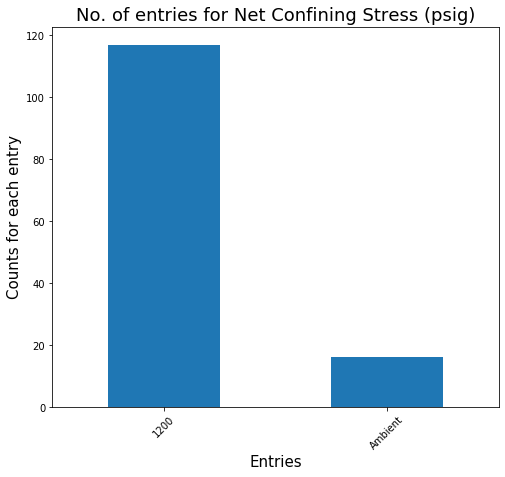

In [9]:
plt.figure(figsize=(8, 7))
df['Net Confining Stress (psig)'].value_counts().plot(kind='bar')
plt.title('No. of entries for Net Confining Stress (psig)', fontsize=18)
plt.xlabel('Entries', fontsize=15)
plt.ylabel('Counts for each entry', fontsize=15)
plt.tick_params(axis='x', labelrotation=45)
plt.show()

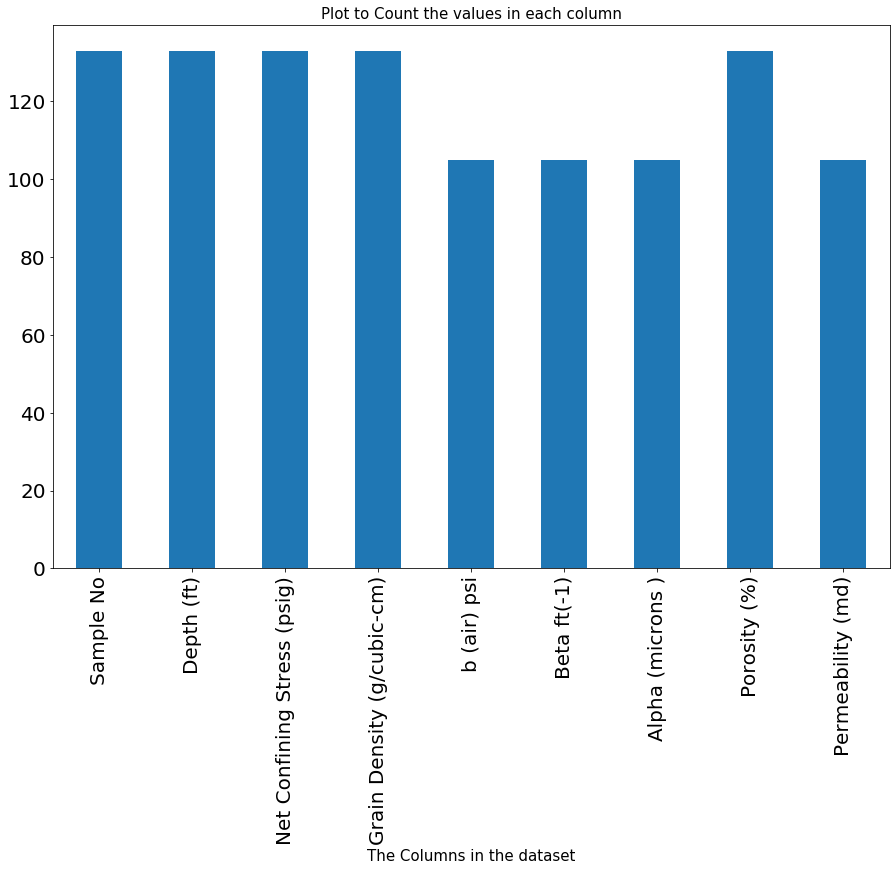

In [11]:
plt.figure(figsize=(15, 10))
df.count().plot(kind='bar', fontsize=20)
plt.xlabel('The Columns in the dataset', fontsize=15)
plt.title('Plot to Count the values in each column', fontsize=15)
plt.show()

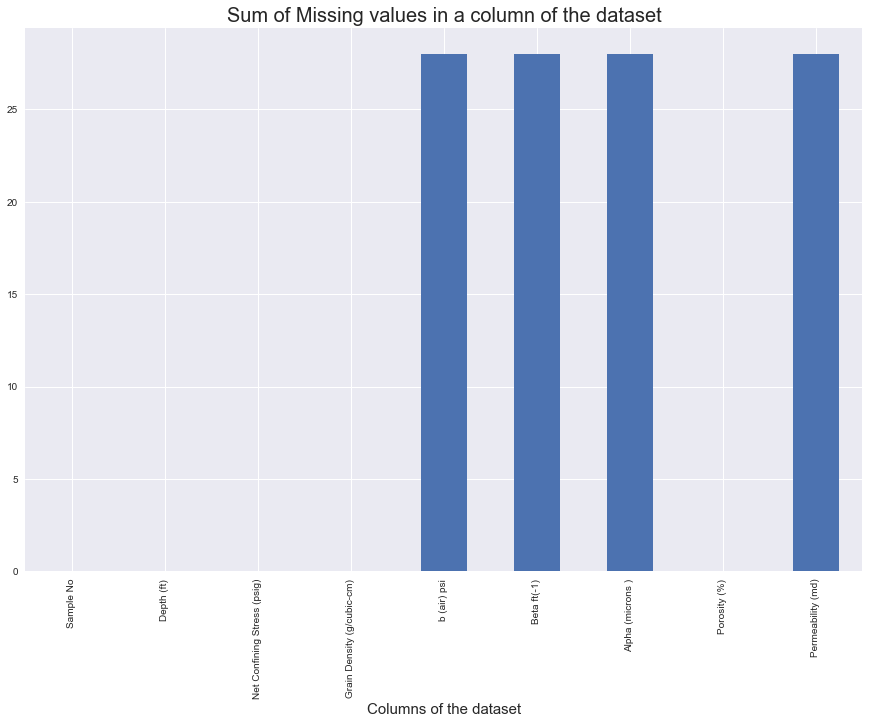

In [15]:
# Visualising the data to get the number of missing values in each column
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
df.isna().sum().plot(kind='bar')
plt.title('Sum of Missing values in a column of the dataset', fontsize=20)
plt.xlabel('Columns of the dataset', fontsize=15)
plt.show()

From the plots above it is realized that there exists missing values in the dataset, and there are some irregularities in some of the columns in the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


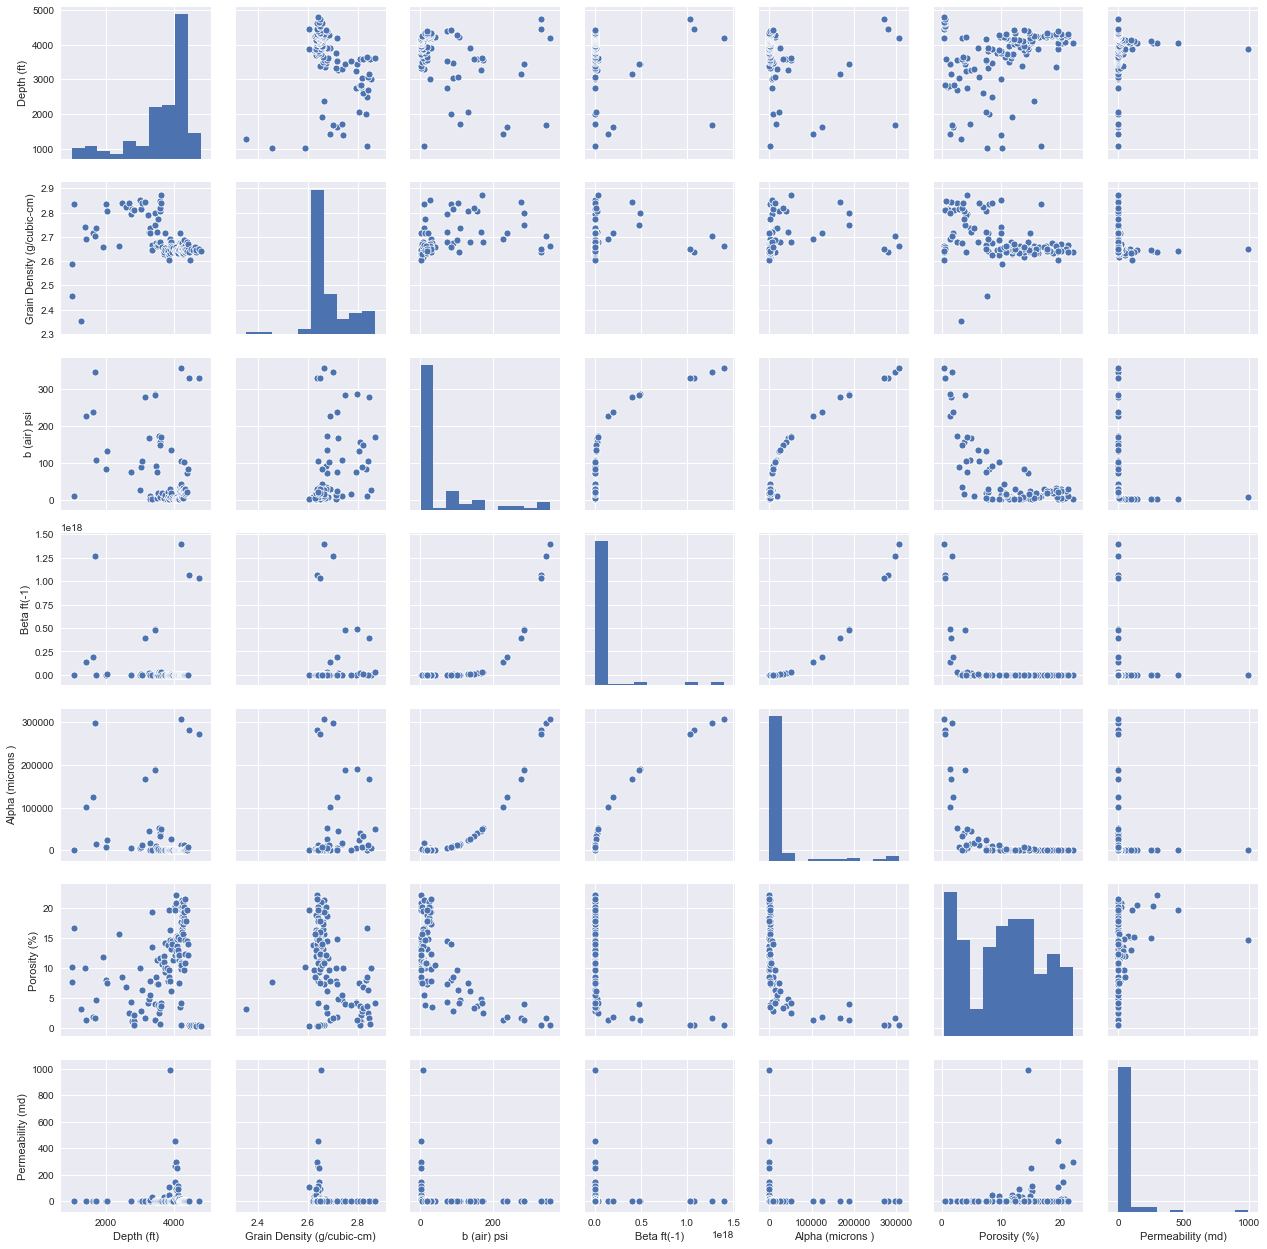

In [16]:
# Making a plot
sns.pairplot(df)

### 3. Data Preparation

In [17]:
# Since Ambient Pressure is equal 0 psig, Let's replace ambient with 0
df['Net Confining Stress (psig)'] = df['Net Confining Stress (psig)'].replace('Ambient', 0)

* Handling Missing

In [18]:
df.isna().sum()

Sample No                       0
Depth (ft)                      0
Net Confining Stress (psig)     0
Grain Density (g/cubic-cm)      0
b (air) psi                    28
Beta ft(-1)                    28
Alpha (microns )               28
Porosity (%)                    0
Permeability (md)              28
dtype: int64

Missing Values eists in four features of the dataset, they are;
* b (air) psi
* Beta ft(-1)
* Alpha (microns )
* Permeability (md)

Missing Values will be replaced with the mean of each the features

In [19]:
df['b (air) psi'] = df['b (air) psi'].replace(np.nan, df['b (air) psi'].mean())
df['Beta ft(-1)'] = df['Beta ft(-1)'].replace(np.nan, df['Beta ft(-1)'].mean())
df['Alpha (microns )'] = df['Alpha (microns )'].replace(np.nan, df['Alpha (microns )'].mean())
df['Permeability (md)'] = df['Permeability (md)'].replace(np.nan, df['Permeability (md)'].mean())

In [20]:
df.isna().sum()

Sample No                      0
Depth (ft)                     0
Net Confining Stress (psig)    0
Grain Density (g/cubic-cm)     0
b (air) psi                    0
Beta ft(-1)                    0
Alpha (microns )               0
Porosity (%)                   0
Permeability (md)              0
dtype: int64

In [21]:
df.head()

,Sample No,Depth (ft),Net Confining Stress (psig),Grain Density (g/cubic-cm),b (air) psi,Beta ft(-1),Alpha (microns ),Porosity (%),Permeability (md)
0,77,1002.0,0,2.588,53.903048,6.302863e+16,22445.176571,10.10,32.304231
1,76,1022.0,0,2.455,53.903048,6.302863e+16,22445.176571,7.63,32.304231
2,75,1062.0,1200,2.837,9.010000,6.620000e+11,1220.000000,16.66,0.798000
3,73,1282.0,1200,2.352,53.903048,6.302863e+16,22445.176571,3.18,32.304231
4,72,1390.0,0,2.742,53.903048,6.302863e+16,22445.176571,9.97,32.304231


* Treatment of Outlier

Text(0.5, 1.0, 'Permeability (md)')

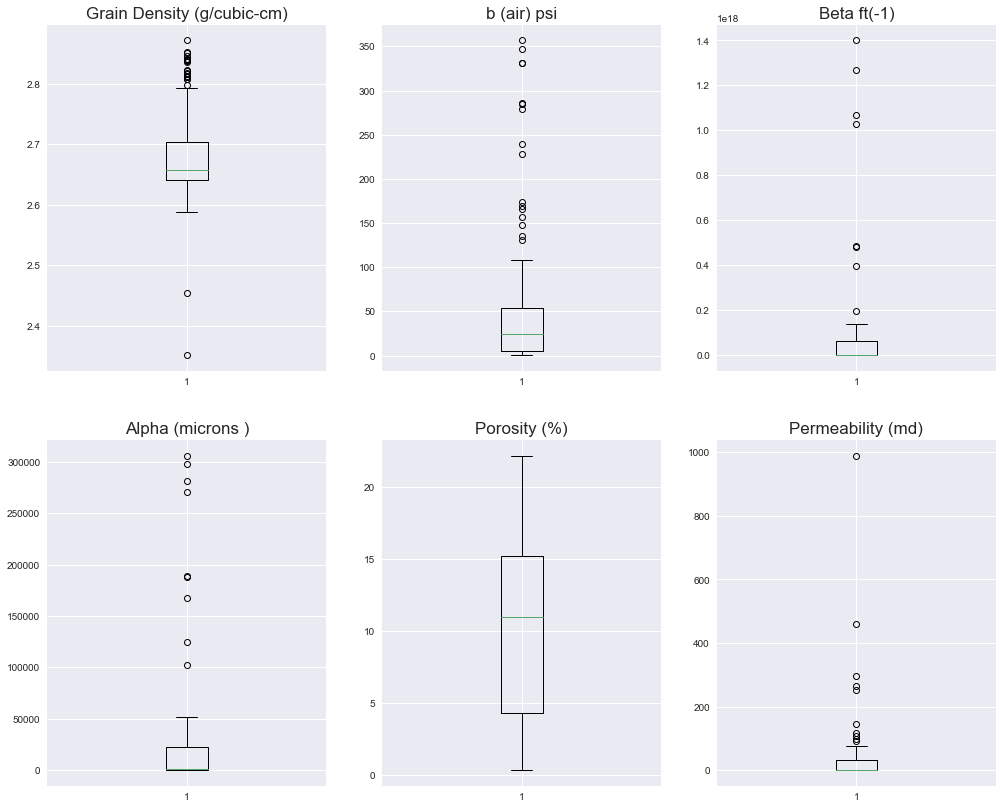

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(17, 14))

# Grain Density (g/cubic-cm)
ax[0, 0].boxplot(df['Grain Density (g/cubic-cm)'])
ax[0, 0].set_title('Grain Density (g/cubic-cm)', fontsize=17)

# b (air) psi
ax[0, 1].boxplot(df['b (air) psi'])
ax[0, 1].set_title('b (air) psi', fontsize=17)

# Beta ft(-1)
ax[0, 2].boxplot(df['Beta ft(-1)'])
ax[0, 2].set_title('Beta ft(-1)', fontsize=17)

# Alpha (microns )
ax[1, 0].boxplot(df['Alpha (microns )'])
ax[1, 0].set_title('Alpha (microns )', fontsize=17)

# Porosity (%)
ax[1, 1].boxplot(df['Porosity (%)'])
ax[1, 1].set_title('Porosity (%)', fontsize=17)

# Permeability (md)
ax[1, 2].boxplot(df['Permeability (md)'])
ax[1, 2].set_title('Permeability (md)', fontsize=17)


There are several outliers in the dataset,this occur as a result core from different samples

In [23]:
# Capping with Quantile
Gten_quantile = df['Grain Density (g/cubic-cm)'].quantile(0.10)
Gnine_quantile = df['Grain Density (g/cubic-cm)'].quantile(0.90)

df['Grain Density (g/cubic-cm)'] = np.where(df['Grain Density (g/cubic-cm)'] < Gten_quantile, Gten_quantile, df['Grain Density (g/cubic-cm)'])
df['Grain Density (g/cubic-cm)'] = np.where(df['Grain Density (g/cubic-cm)'] > Gnine_quantile, Gnine_quantile, df['Grain Density (g/cubic-cm)'])

In [24]:
# Capping with Quantile
bten_quantile = df['b (air) psi'].quantile(0.10)
bnine_quantile = df['b (air) psi'].quantile(0.90)

#df['b (air) psi''] = np.where(df['b (air) psi''] < bten_quantile, bten_quantile, df['b (air) psi''])
df['b (air) psi'] = np.where(df['b (air) psi'] > bnine_quantile, bnine_quantile, df['b (air) psi'])

In [25]:
# Capping with Quantile
Bten_quantile = df['Beta ft(-1)'].quantile(0.10)
Bnine_quantile = df['Beta ft(-1)'].quantile(0.90)

#df['Beta ft(-1)'] = np.where(df['Beta ft(-1)'] < bten_quantile, bten_quantile, df['Beta ft(-1)'])
df['Beta ft(-1)'] = np.where(df['Beta ft(-1)'] > Bnine_quantile, Bnine_quantile, df['Beta ft(-1)'])

In [26]:
# Capping with Quantile
Aten_quantile = df['Alpha (microns )'].quantile(0.10)
Anine_quantile = df['Alpha (microns )'].quantile(0.90)

#df['Alpha (microns )'] = np.where(df['Alpha (microns )'] < bten_quantile, bten_quantile, df['Alpha (microns )'])
df['Alpha (microns )'] = np.where(df['Alpha (microns )'] > Anine_quantile, Anine_quantile, df['Alpha (microns )'])

In [27]:
# Capping with Quantile
pten_quantile = df['Permeability (md)'].quantile(0.10)
pnine_quantile = df['Permeability (md)'].quantile(0.90)

#df['Permeability (md)'] = np.where(df['Permeability (md)'] < pten_quantile, pten_quantile, df['Permeability (md)'])
df['Permeability (md)'] = np.where(df['Permeability (md)'] > pnine_quantile, pnine_quantile, df['Permeability (md)'])

Text(0.5, 1, 'Correlation Plot')

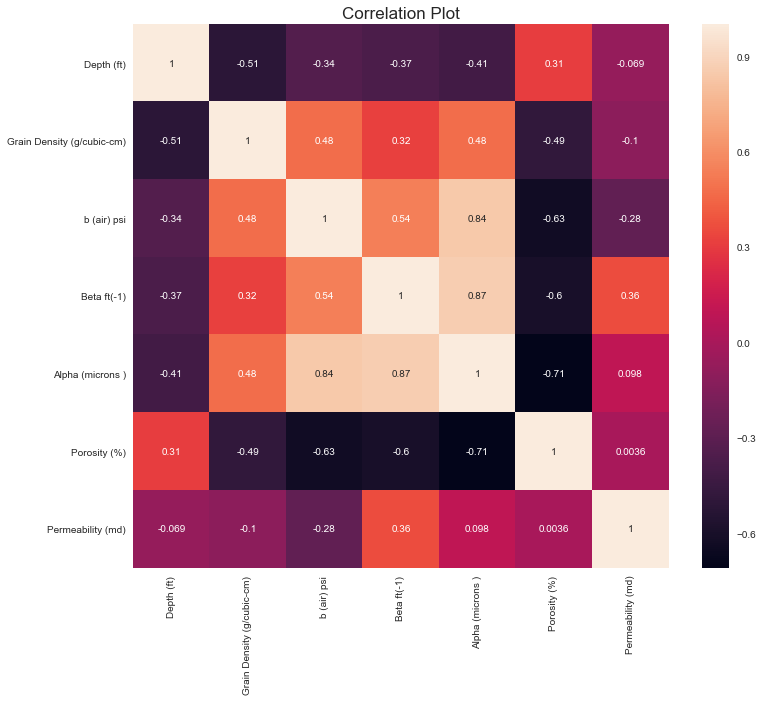

In [28]:
# Heatmap for the correlation check.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Plot', fontsize=17)

### 4. Data Preprocessing
* Feature Selection

In [29]:
df.columns

Index(['Sample No', 'Depth (ft)', 'Net Confining Stress (psig)',
       'Grain Density (g/cubic-cm)', 'b (air) psi', 'Beta ft(-1)',
       'Alpha (microns )', 'Porosity (%)', 'Permeability (md)'],
      dtype='object')

In [30]:
data = df.drop(columns=['Sample No', 'Net Confining Stress (psig)'])

In [31]:
data.head()

,Depth (ft),Grain Density (g/cubic-cm),b (air) psi,Beta ft(-1),Alpha (microns ),Porosity (%),Permeability (md)
0,1002.0,2.6342,53.903048,6.302863e+16,22445.176571,10.10,32.304231
1,1022.0,2.6342,53.903048,6.302863e+16,22445.176571,7.63,32.304231
2,1062.0,2.8144,9.010000,6.620000e+11,1220.000000,16.66,0.798000
3,1282.0,2.6342,53.903048,6.302863e+16,22445.176571,3.18,32.304231
4,1390.0,2.7420,53.903048,6.302863e+16,22445.176571,9.97,32.304231


The columns; Sample No and the Net Confining Stress were dropped as a result of their non effect in the correlation plot

In [32]:
# Separating the input parameters from the target variables. Let input parameters be X, and the target, y
X = data.iloc[:,:-2]
X.head()

,Depth (ft),Grain Density (g/cubic-cm),b (air) psi,Beta ft(-1),Alpha (microns )
0,1002.0,2.6342,53.903048,6.302863e+16,22445.176571
1,1022.0,2.6342,53.903048,6.302863e+16,22445.176571
2,1062.0,2.8144,9.010000,6.620000e+11,1220.000000
3,1282.0,2.6342,53.903048,6.302863e+16,22445.176571
4,1390.0,2.7420,53.903048,6.302863e+16,22445.176571


* Feature Scaling: This done for the entire input to be of the same scale and almost same statistical parameters

In [33]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_std = trans.fit_transform(X)

In [34]:
y = np.log(data.iloc[:,-2:])
y.head()

,Porosity (%),Permeability (md)
0,2.312535,3.475198
1,2.032088,3.475198
2,2.813011,-0.225647
3,1.156881,3.475198
4,2.299581,3.475198


* Splitting of the dataset

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### 5. Model Building

#### Model 1 Random Forest Machine Regressor Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

rfr_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42, max_features='sqrt'))
rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_test, y_test)))

MAE: 0.40497386122768597
MSE: 0.34540291538122014
RMSE: 0.5877098904912356
R2_score: 0.821504392607468
__________________________________________

Accuracy on train data: 0.9837911585636336
Accuracy on test data: 0.821504392607468


#### Model 2 K-Neighbors Regressor Models

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=10, algorithm='ball_tree', weights='distance', n_jobs=-1))
knr_model.fit(X_train, y_train)

y_pred_knr = knr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_knr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_knr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_knr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(knr_model.score(X_test, y_test)))

MAE: 0.6273358675305484
MSE: 0.7969926859744043
RMSE: 0.8927444684647474
R2_score: 0.7364348758092758
__________________________________________

Accuracy on train data: 1.0
Accuracy on test data: 0.7364348758092758


#### Model 3: XGBoost

In [34]:
from xgboost import XGBRegressor
xgbr_model = MultiOutputRegressor(XGBRegressor(n_estimators=1000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.4, random_state = 0))
xgbr_model.fit(X_train, y_train)

y_pred_xgbr = xgbr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_xgbr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_xgbr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_xgbr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(xgbr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(xgbr_model.score(X_test, y_test)))

MAE: 0.4759938207084498
MSE: 0.47956901122730106
RMSE: 0.6925092138212322
R2_score: 0.8547023273620562
__________________________________________

Accuracy on train data: 0.9935997778489358
Accuracy on test data: 0.8547023273620562


#### Model 4: SVM 

In [35]:
from sklearn.svm import SVR
svm_model = MultiOutputRegressor(SVR(kernel='rbf', gamma='auto', epsilon=0.7))
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_svm)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_svm)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_svm)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(svm_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(svm_model.score(X_test, y_test)))

MAE: 0.9536122481618252
MSE: 1.5609162488111352
RMSE: 1.2493663389139054
R2_score: 0.6636404313455075
__________________________________________

Accuracy on train data: 0.7550042934876282
Accuracy on test data: 0.6636404313455075


#### Model 5: MultiLayer Perceptron Regressor

In [36]:
from sklearn.neural_network import MLPRegressor
mlp_model = MultiOutputRegressor(MLPRegressor(random_state = 0, activation='relu', hidden_layer_sizes = (100, 50, 70)))
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_mlp)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_mlp)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_mlp)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(mlp_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(mlp_model.score(X_test, y_test)))

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MAE: 0.5480882305956879
MSE: 0.6797523598157814
RMSE: 0.8244709575332423
R2_score: 0.7660612581148905
__________________________________________

Accuracy on train data: 0.9543862120600295
Accuracy on test data: 0.7660612581148905


C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Model 5: Voting Regressor

In [37]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Training classifiers
reg1 = (RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42, max_features='sqrt'))
reg2 = (KNeighborsRegressor(n_neighbors=10, algorithm='ball_tree', weights='distance', n_jobs=-1))
reg3 = (XGBRegressor(n_estimators=1000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.4, random_state = 0))
reg4 = (MLPRegressor(random_state = 0, activation='relu', hidden_layer_sizes = (100, 50, 70)))

ereg = MultiOutputRegressor(VotingRegressor(estimators=[('rf', reg1), ('kn', reg2), ('xg', reg3), ('mlp', reg4)]))
ereg.fit(X_train, y_train)

y_pred_vr = ereg.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_vr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_vr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_vr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(ereg.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(ereg.score(X_test, y_test)))

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MAE: 0.452379013377653
MSE: 0.3954006521509703
RMSE: 0.6288089154512445
R2_score: 0.837301031226985
__________________________________________

Accuracy on train data: 0.9917025254175631
Accuracy on test data: 0.837301031226985


### Model Performnce Measurement

* Errors Measurement

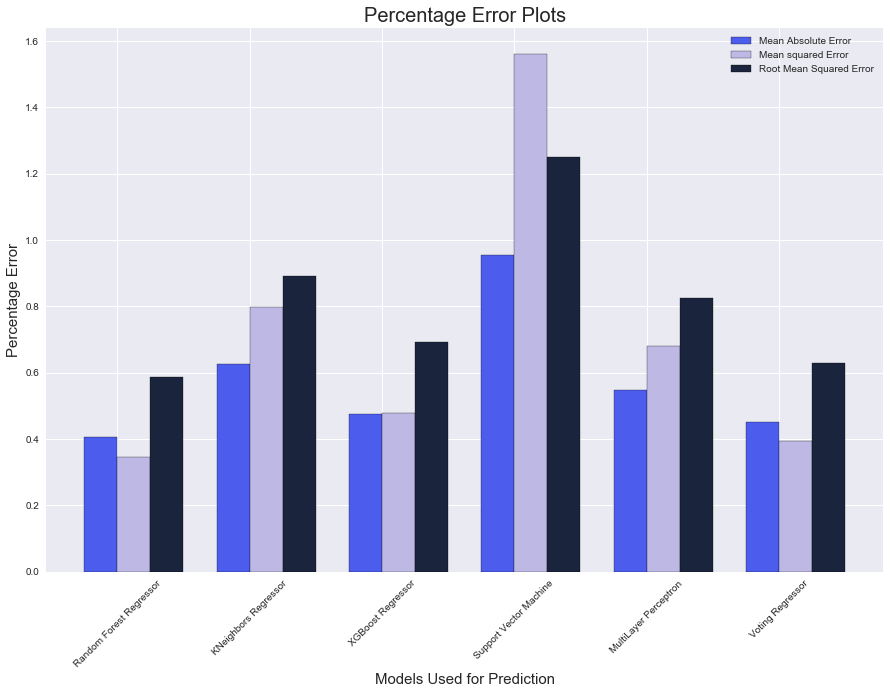

In [38]:
# Percentage Error plot
Model = ['Random Forest Regressor', 'KNeighbors Regressor', 'XGBoost Regressor', 'Support Vector Machine', 
         'MultiLayer Perceptron', 'Voting Regressor']

MAE = [metrics.mean_absolute_error(y_test, y_pred_rfr), metrics.mean_absolute_error(y_test, y_pred_knr), 
       metrics.mean_absolute_error(y_test, y_pred_xgbr), metrics.mean_absolute_error(y_test, y_pred_svm),
       metrics.mean_absolute_error(y_test, y_pred_mlp), metrics.mean_absolute_error(y_test, y_pred_vr)]
                                   
MSE = [metrics.mean_squared_error(y_test, y_pred_rfr), metrics.mean_squared_error(y_test, y_pred_knr), 
       metrics.mean_squared_error(y_test, y_pred_xgbr), metrics.mean_squared_error(y_test, y_pred_svm), 
       metrics.mean_squared_error(y_test, y_pred_mlp), metrics.mean_squared_error(y_test, y_pred_vr)]

RMSE = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr)), 
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbr)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)), 
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr))]

n = 6
r = np.arange(n)
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(r, MAE, color = '#4C5DED', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, MSE, color = '#BEB9E4', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, RMSE, color = '#1A243C', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Models Used for Prediction', fontsize=15)
plt.ylabel('Percentage Error', fontsize=15)
plt.title('Percentage Error Plots', fontsize=20)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Model)
plt.legend()
  
plt.show()

* Accuracy Measurement

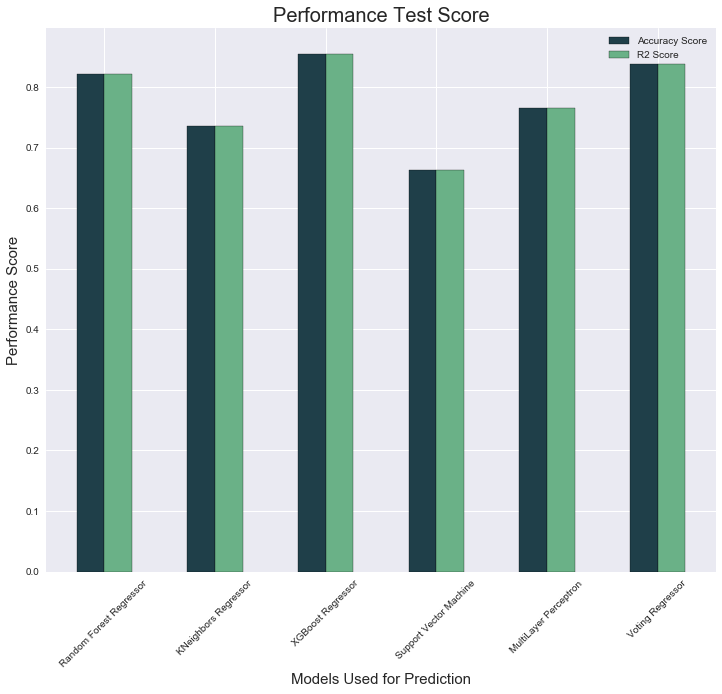

In [39]:
# plots for Accuracy Score

Accuracy = [rfr_model.score(X_test, y_test), knr_model.score(X_test, y_test), xgbr_model.score(X_test, y_test),
            svm_model.score(X_test, y_test), mlp_model.score(X_test, y_test), ereg.score(X_test, y_test),]

R2_score = [r2_score(y_test, y_pred_rfr), r2_score(y_test, y_pred_knr), r2_score(y_test, y_pred_xgbr),
           r2_score(y_test, y_pred_svm), r2_score(y_test, y_pred_mlp), r2_score(y_test, y_pred_vr)]

n = 6
r = np.arange(n)
width = 0.25
plt.figure(figsize=(12, 10))
plt.bar(r, Accuracy, color='#1F3F49', width=width, edgecolor = 'black', label = 'Accuracy Score')
plt.bar(r+width, R2_score, color = '#6AB187', width=width, edgecolor = 'black', label = 'R2 Score')

plt.xlabel('Models Used for Prediction', fontsize=15)
plt.ylabel('Performance Score', fontsize=15)
plt.title('Performance Test Score', fontsize=20)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Model)
plt.legend()
  
plt.show()